<a href="https://colab.research.google.com/github/Magesh2003/Mini-project/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import sklearn
from sklearn import preprocessing

In [ ]:
real_df = pd.read_csv("../input/cirrhosis-prediction-dataset/cirrhosis.csv")

In [ ]:
real_df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
real_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
ID,1,2,3,4,5,6,7,8,9,10,...,409,410,411,412,413,414,415,416,417,418
N_Days,400,4500,1012,1925,1504,2503,1832,2466,2400,51,...,1067,1072,1119,1097,989,681,1103,1055,691,976
Status,D,C,D,D,CL,D,C,D,D,D,...,C,C,C,C,C,D,C,C,C,C
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo,Placebo,Placebo,Placebo,D-penicillamine,Placebo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,21464,20617,25594,19994,13918,24201,20284,19379,15526,25772,...,15706,14245,18628,24472,12784,24472,14245,20819,21185,19358
Sex,F,F,M,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
Ascites,Y,N,N,N,N,N,N,N,N,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,Y,Y,N,Y,Y,Y,Y,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,Y,Y,N,Y,Y,N,N,N,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,Y,N,S,S,N,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N


In [ ]:
real_df.shape

(418, 20)

In [ ]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
real_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


### check for null values in dataset

In [ ]:
real_df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### Lets see how this null value is distributed all over the dataset with the help of heatmap

<AxesSubplot:>

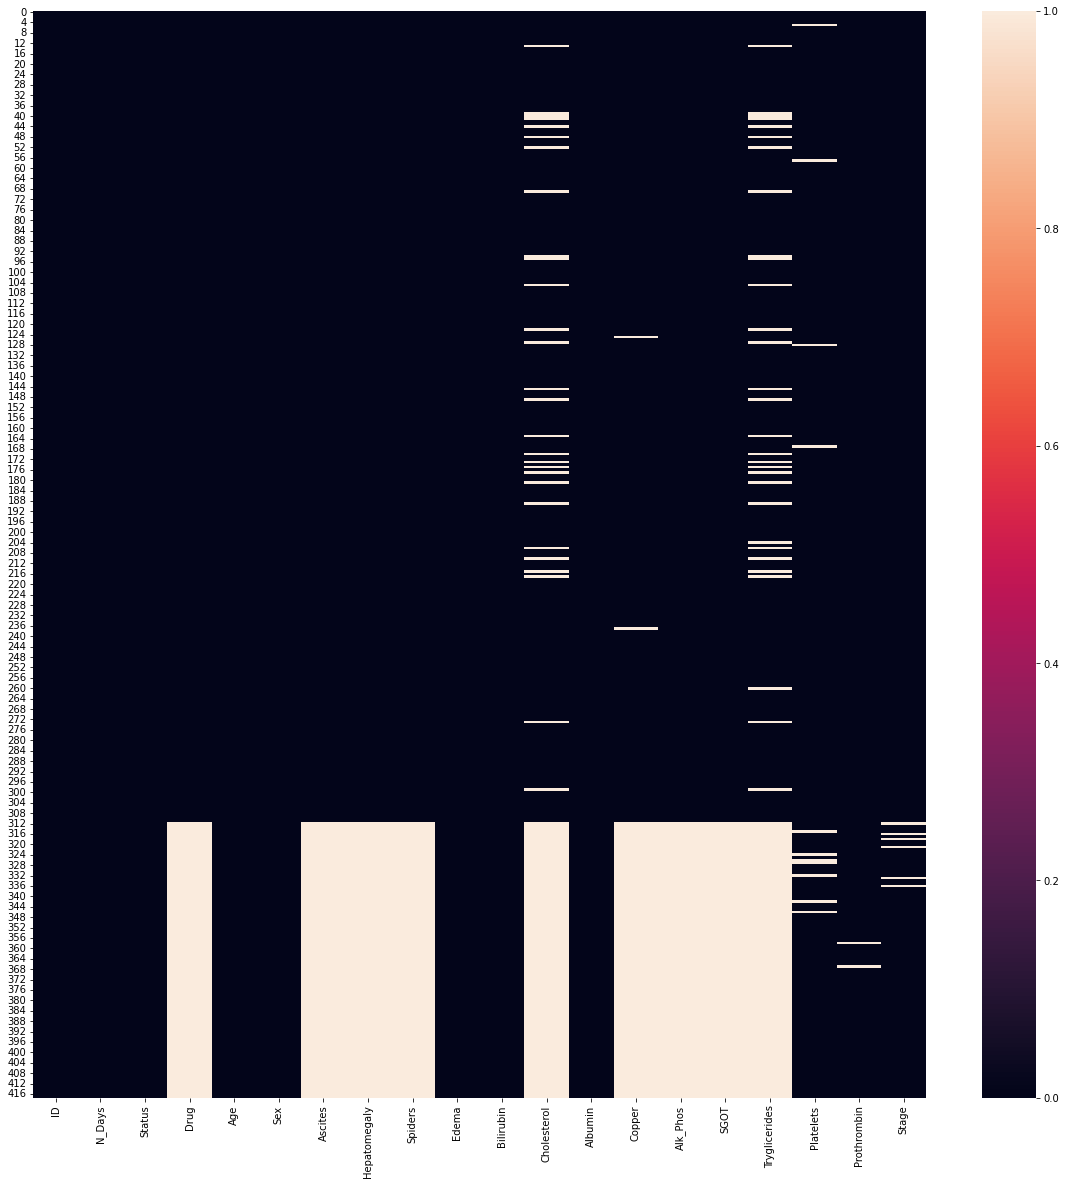

In [ ]:
plt.figure(figsize=[20,20])
sns.heatmap(real_df.isnull())

In [ ]:
# df1 = real_df[real_df['Stage'].notnull()] another method to remove null rows based on single column
# df1

### As you can see there are some null values in target feature lets drop it

In [ ]:
real_df[real_df['Stage'].isnull()].index # this is how we have to extract null value index

Int64Index([312, 316, 318, 321, 333, 336], dtype='int64')

In [ ]:
df1 = real_df.drop(real_df[real_df['Stage'].isnull()].index) #drop null value from dataframe

In [ ]:
df1.reset_index(drop=True,inplace=True) #reset the index

In [ ]:
df1['Stage'].isnull().sum()

0

In [ ]:
df1.shape

(412, 20)

### Find correlation between features and with target .

<AxesSubplot:>

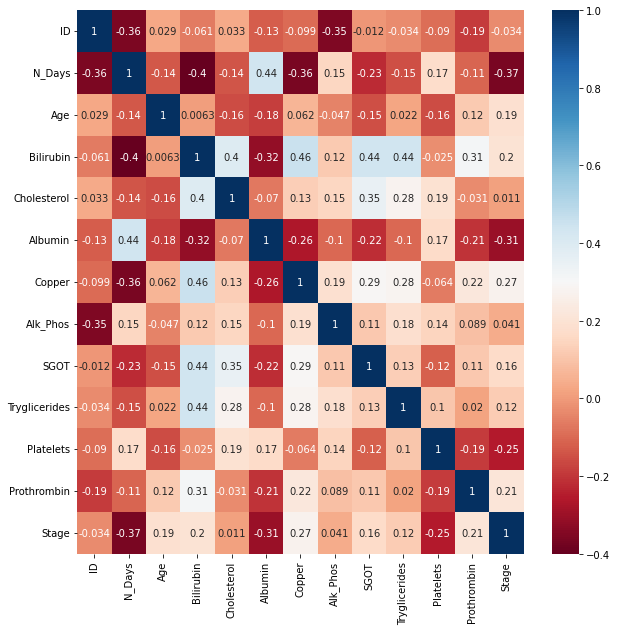

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="RdBu", annot=True)

## Handling null values

In [ ]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.scatterplot(x=df1[i], y=df1['Stage'], palette='Blues')
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

### Visualize how values of each numerical feature distributed in each stage
### As you can see below each stage has different value range

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

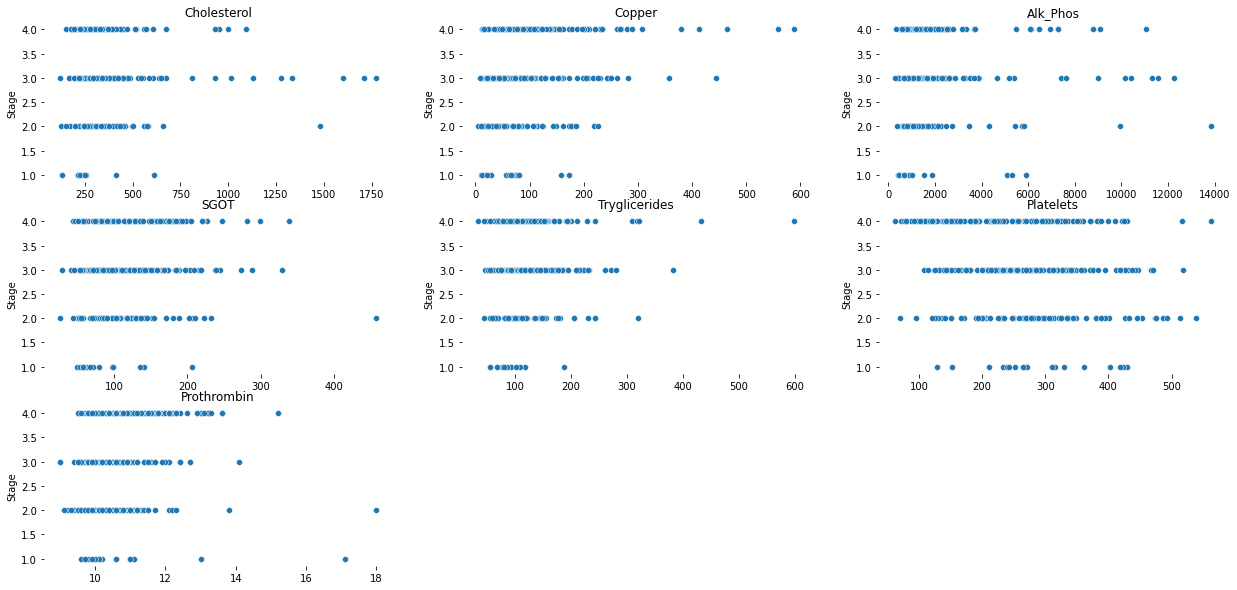

In [ ]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

### So what can we do is fill numerical null values by random selection of values between min and max possible values in that stage of liver cirrhosis and categorical null value by most repeated value

In [ ]:
df2 = df1.dropna()     # lets drop all null value in the dataframe and copy it to df2
df2.shape

(276, 20)

### find max and min value of each feature and stage by removing outliers

In [ ]:
def max_min_collect(df,column_list):
    max_min_list = []
    for col in column_list:
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1
        x=[abs(1.5 * IQR - Q1), abs(Q3 + 1.5 * IQR)]
        max_min_list.append(x)

    return max_min_list



#         drop_outliers = [x for x in df[col] if (
#         (x > Q1 - 1.5 * IQR) & (x < Q3 + 1.5 * IQR))]
#         df = df.loc[df[col].isin(drop_outliers)]
#     return df

In [ ]:
# list_num = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
# max_min_value = max_min_collect(df2,list_num)
# max_min_value

In [ ]:
# max_min_value[0][1]

In [ ]:
check_normal1 = df2.groupby(['Stage']) #group by stages for df2- this grouping is done to find max and min value
stage_1_1 = check_normal1.get_group(1)
stage_2_1 = check_normal1.get_group(2)
stage_3_1 = check_normal1.get_group(3)
stage_4_1 = check_normal1.get_group(4)


In [ ]:
list_num = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']# numerical value column list
stage_names = [stage_1_1, stage_2_1, stage_3_1, stage_4_1]
min_max_for_all_stages = []
for i in stage_names:
    max_min_value = max_min_collect(i,list_num)
    min_max_for_all_stages.append(max_min_value)
min_max_for_all_stages

[[[157.5, 311.5],
  [64.75, 163.25],
  [245.375, 2101.625],
  [3.82500000000001, 159.07500000000002],
  [27.5, 135.5],
  [112.375, 433.375],
  [8.462499999999999, 12.5625]],
 [[35.75, 637.75],
  [46.5, 165.5],
  [610.0, 3346.0],
  [17.91250000000001, 232.38750000000002],
  [1.0, 223.0],
  [56.75, 510.75],
  [8.700000000000003, 11.899999999999999]],
 [[10.75, 688.75],
  [67.75, 234.25],
  [788.75, 3821.25],
  [22.412499999999966, 262.68749999999994],
  [24.5, 279.5],
  [41.25, 499.25],
  [8.325000000000003, 12.524999999999999]],
 [[44.875, 573.875],
  [105.625, 333.375],
  [768.625, 3894.375],
  [15.781249999999972, 266.76874999999995],
  [6.375, 244.625],
  [61.125, 507.875],
  [8.700000000000001, 13.499999999999998]]]

In [ ]:
 min_max_for_all_stages[0][0][0] #this is how we access min and max value

157.5

In [ ]:
check_normal = df1.groupby(['Stage']) #group the stages for df1
stage_1 = check_normal.get_group(1)
stage_2 = check_normal.get_group(2)
stage_3 = check_normal.get_group(3)
stage_4 = check_normal.get_group(4)
stage_4

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
10,11,3762,D,Placebo,19619,F,N,Y,Y,N,1.4,259.0,4.16,46.0,1104.0,79.05,79.0,258.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,401,935,D,NaN,25202,F,NaN,NaN,NaN,N,4.2,NaN,3.19,NaN,NaN,NaN,NaN,120.0,11.1,4.0
396,403,1141,C,NaN,24107,F,NaN,NaN,NaN,N,2.5,NaN,3.33,NaN,NaN,NaN,NaN,256.0,10.8,4.0
399,406,703,D,NaN,16802,F,NaN,NaN,NaN,N,4.5,NaN,2.68,NaN,NaN,NaN,NaN,219.0,11.5,4.0
408,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0


In [ ]:
stages = [stage_1,stage_2,stage_3,stage_4]

### Fill object (drug,ascites,hemetomegally, spiders)  null values by using mode (most repeated value in that feature & stage)

In [ ]:
# df1.select_dtypes(include='object').columns
def dtype_obj_fillnull(stage_list):

    for stage_range in stage_list:

        x1 = stage_range.select_dtypes(include='object')
        x1 = x1.columns[x1.isna().any()].tolist()

        for i in x1:

            collect_null_index = stage_range[stage_range[i].isnull()].index.tolist()
            get_repeat_value = stage_range[i].mode()[0]

            for j in collect_null_index:

                df1.loc[[j],i] = get_repeat_value

    return df1




In [ ]:
after_obj_null_correction = dtype_obj_fillnull(stages)
after_obj_null_correction.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

### Try to fill the null values by selecting random values between min and max value in that column for (choles, copper,Alk_posph,...).

In [ ]:
x1 = stage_4.select_dtypes(exclude='object') # this is how we have to extract the numerical null value column names
x1 = x1.columns[x1.isna().any()].tolist()
x1

['Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [ ]:
def dtype_num_fillnull(stage_list):

    for stage_range in stage_list:

        x1 = stage_range.select_dtypes(exclude='object')
        x1 = x1.columns[x1.isna().any()].tolist()

        z=0

        for i in range(0,len(x1)):

            collect_null_index = stage_range[stage_range[x1[i]].isnull()].index.tolist()

            for j in collect_null_index:

                if i!=3: #SGOT has 2 decimal values eg:213.87
                     get_random_value = round(random.uniform(min_max_for_all_stages[z][i][0], min_max_for_all_stages[z][i][1]), 1)
                else:
                     get_random_value = round(random.uniform(min_max_for_all_stages[z][i][0], min_max_for_all_stages[z][i][1]), 2)

                after_obj_null_correction.loc[[j],x1[i]] = get_random_value
        z+=1

    return after_obj_null_correction


In [ ]:
after_num_null_correction =  dtype_num_fillnull(stages)
after_num_null_correction

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,D,Placebo,24472,F,N,N,N,N,1.2,306.4,2.96,136.3,1643.4,108.93,66.3,174.0,10.9,3.0
408,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,176.5,3.83,67.8,1687.7,54.76,131.1,180.0,11.2,4.0
409,416,1055,C,Placebo,20819,F,N,N,N,N,1.6,303.6,3.42,113.1,1273.8,141.91,61.1,143.0,9.9,3.0
410,417,691,C,Placebo,21185,F,N,N,N,N,0.8,262.7,3.75,101.1,1987.5,128.03,101.4,269.0,10.4,3.0


### Visualize the value diastribution after handling null values

In [ ]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.scatterplot(x=df1[i], y=df1['Stage'], palette='Blues')
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

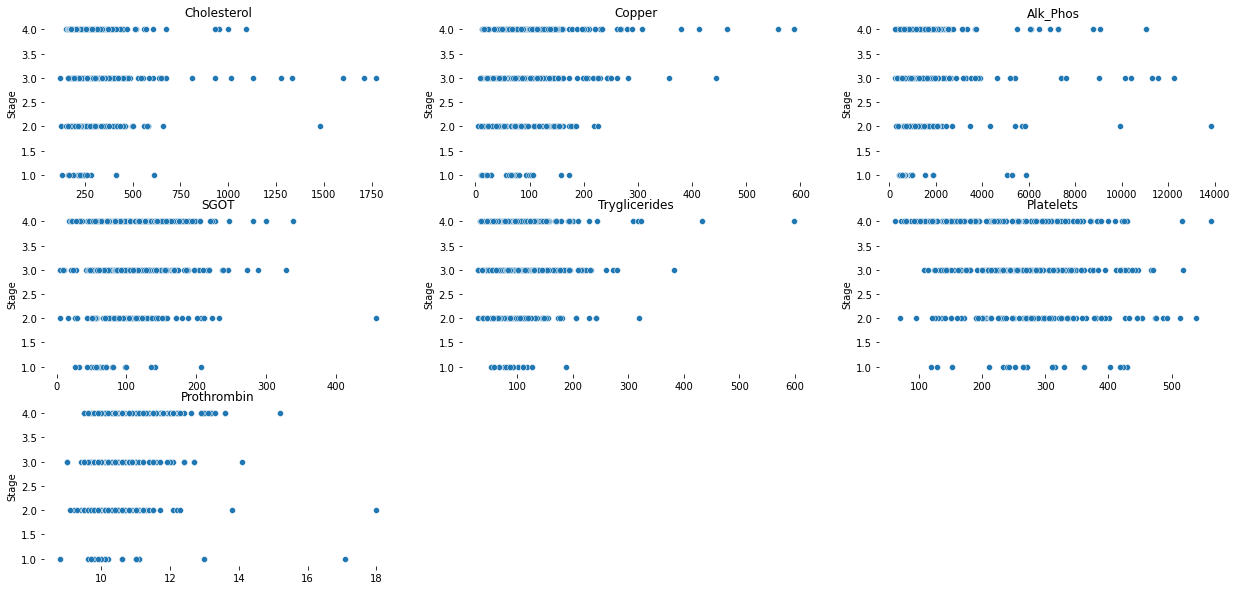

In [ ]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

In [ ]:
after_num_null_correction.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
after_num_null_correction.duplicated().sum()

0

In [ ]:
after_num_null_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   N_Days         412 non-null    int64  
 2   Status         412 non-null    object 
 3   Drug           412 non-null    object 
 4   Age            412 non-null    int64  
 5   Sex            412 non-null    object 
 6   Ascites        412 non-null    object 
 7   Hepatomegaly   412 non-null    object 
 8   Spiders        412 non-null    object 
 9   Edema          412 non-null    object 
 10  Bilirubin      412 non-null    float64
 11  Cholesterol    412 non-null    float64
 12  Albumin        412 non-null    float64
 13  Copper         412 non-null    float64
 14  Alk_Phos       412 non-null    float64
 15  SGOT           412 non-null    float64
 16  Tryglicerides  412 non-null    float64
 17  Platelets      412 non-null    float64
 18  Prothrombi

In [ ]:
after_num_null_correction['Age'] = (after_num_null_correction['Age']/365).astype('int64') # convert age to years
after_num_null_correction


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,D,Placebo,67,F,N,N,N,N,1.2,306.4,2.96,136.3,1643.4,108.93,66.3,174.0,10.9,3.0
408,415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,176.5,3.83,67.8,1687.7,54.76,131.1,180.0,11.2,4.0
409,416,1055,C,Placebo,57,F,N,N,N,N,1.6,303.6,3.42,113.1,1273.8,141.91,61.1,143.0,9.9,3.0
410,417,691,C,Placebo,58,F,N,N,N,N,0.8,262.7,3.75,101.1,1987.5,128.03,101.4,269.0,10.4,3.0


### Again see the correlation after handling null values

<AxesSubplot:>

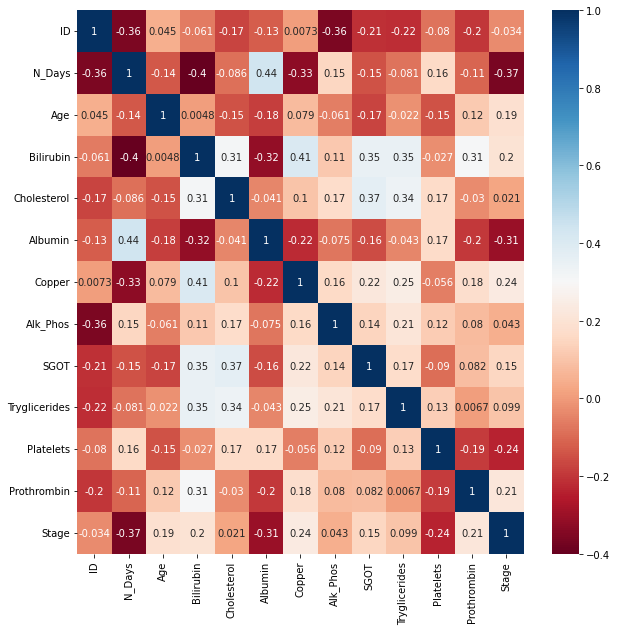

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(after_num_null_correction.corr(), cmap="RdBu", annot=True)

In [ ]:
stage_corr = after_num_null_correction.corr()['Stage'][:-1]
stage_corr

ID              -0.033757
N_Days          -0.366193
Age              0.186581
Bilirubin        0.200731
Cholesterol      0.021141
Albumin         -0.305296
Copper           0.236048
Alk_Phos         0.042820
SGOT             0.151414
Tryglicerides    0.099257
Platelets       -0.237841
Prothrombin      0.213715
Name: Stage, dtype: float64

### As i told you before we going to have 2 target values instead of 4
### 0 means no cirrhosis
### 1 means cirrhosis

In [ ]:
after_num_null_correction['Stage'] = np.where(after_num_null_correction['Stage'] == 4,1,0) #replace stage 4 as 1(positive) and rest of the stages in to 0(negative)

In [ ]:
check_1 = after_num_null_correction.groupby(['Stage'])
check_1.get_group(0).shape

(268, 20)

<AxesSubplot:>

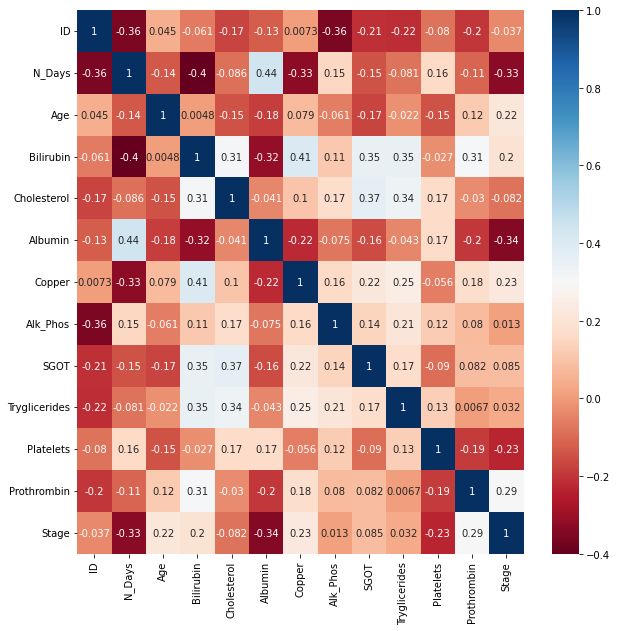

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(after_num_null_correction.corr(), cmap="RdBu", annot=True)

In [ ]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.scatterplot(x=df1[i], y=df1['Stage'], palette='Blues')
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

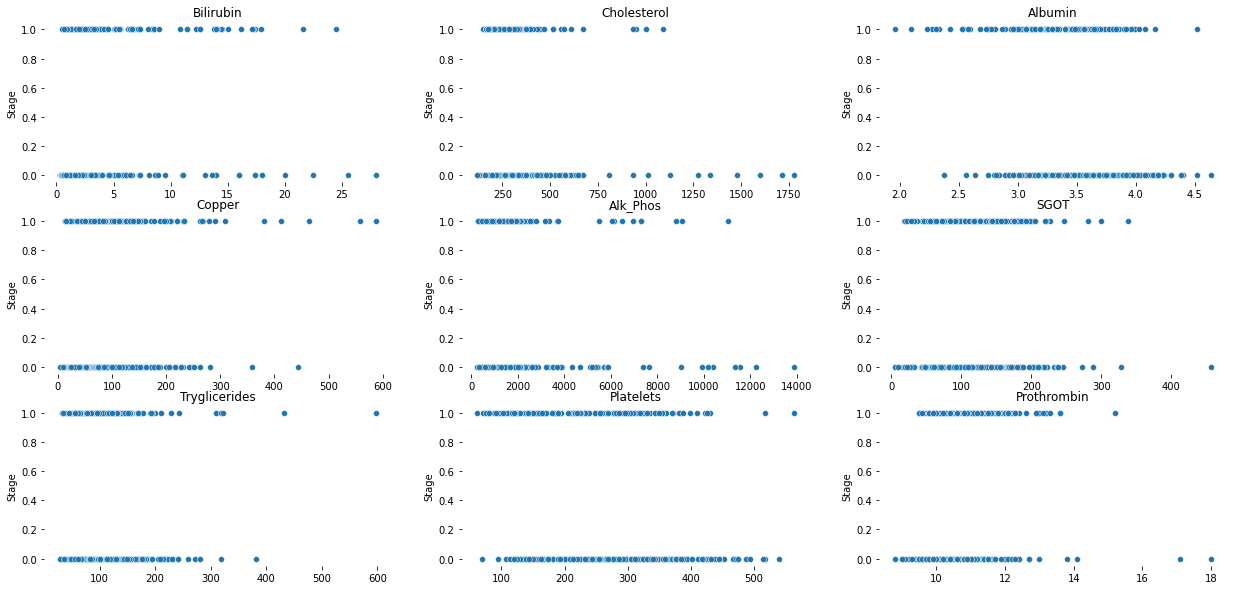

In [ ]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

### visualization of categorical feature distribution after stage one-hot encoding

In [ ]:
def plot_object(obj_col_list):
    c=1
    for i in obj_col_list:
        plt.subplot(3,2,c)
        sns.countplot(x=after_num_null_correction['Stage'], hue=after_num_null_correction[i], palette='Blues', alpha=0.9)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

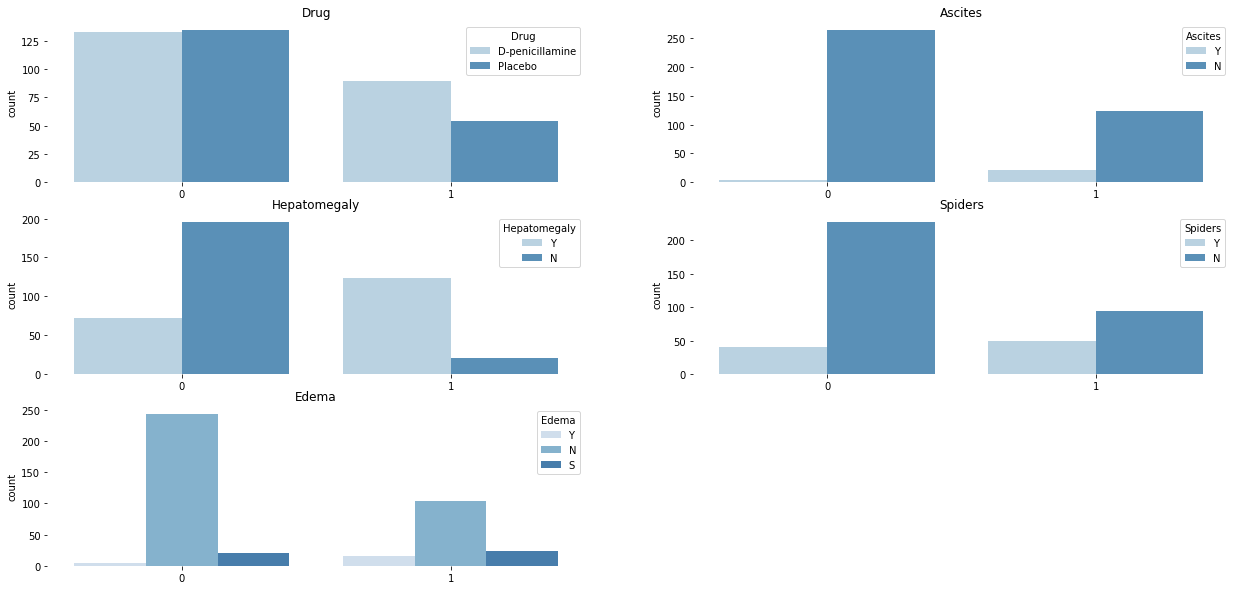

In [ ]:
plt.figure(figsize=(21.2,10))
list_obj_toplot = ['Drug','Ascites','Hepatomegaly','Spiders','Edema']
plot_object(list_obj_toplot)


In [ ]:
def plot_num(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.kdeplot(x=after_num_null_correction[i], hue=after_num_null_correction['Stage'], fill=True, palette='RdBu', common_norm=True)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

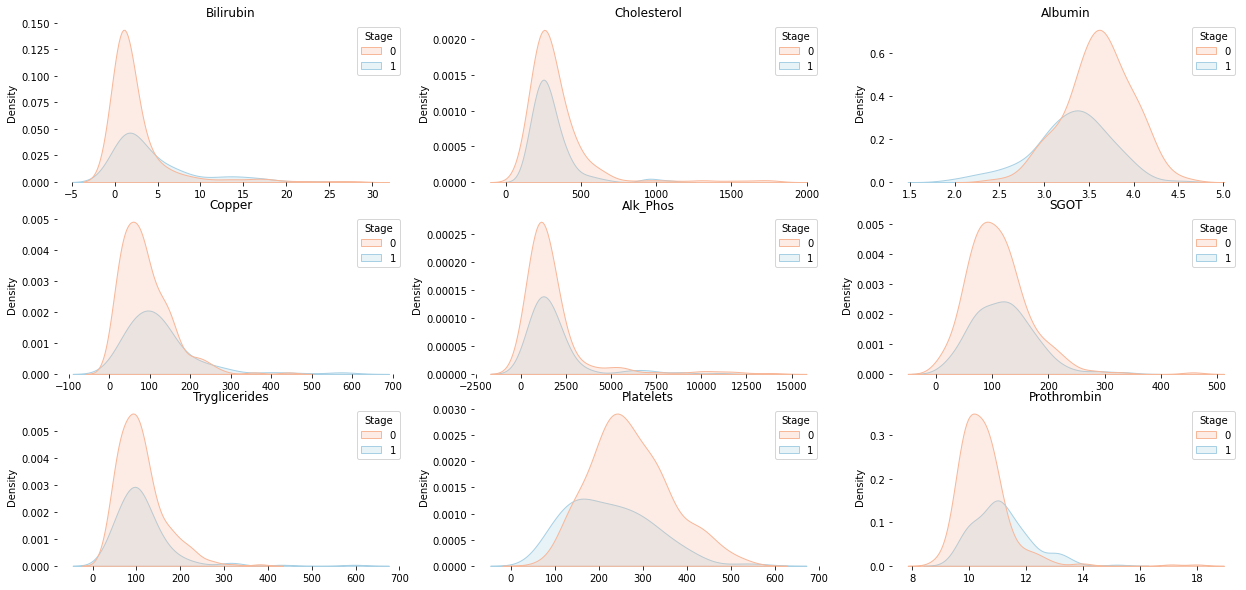

In [ ]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_num(list_num_toplot)

In [ ]:
def plot_reg(num_col_list):
    c=1
    for i in num_col_list:
        plt.subplot(3,3,c)
        sns.regplot(x=after_num_null_correction[i], y=after_num_null_correction['Stage'], scatter=False, logistic=True, color='royalblue')
        sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

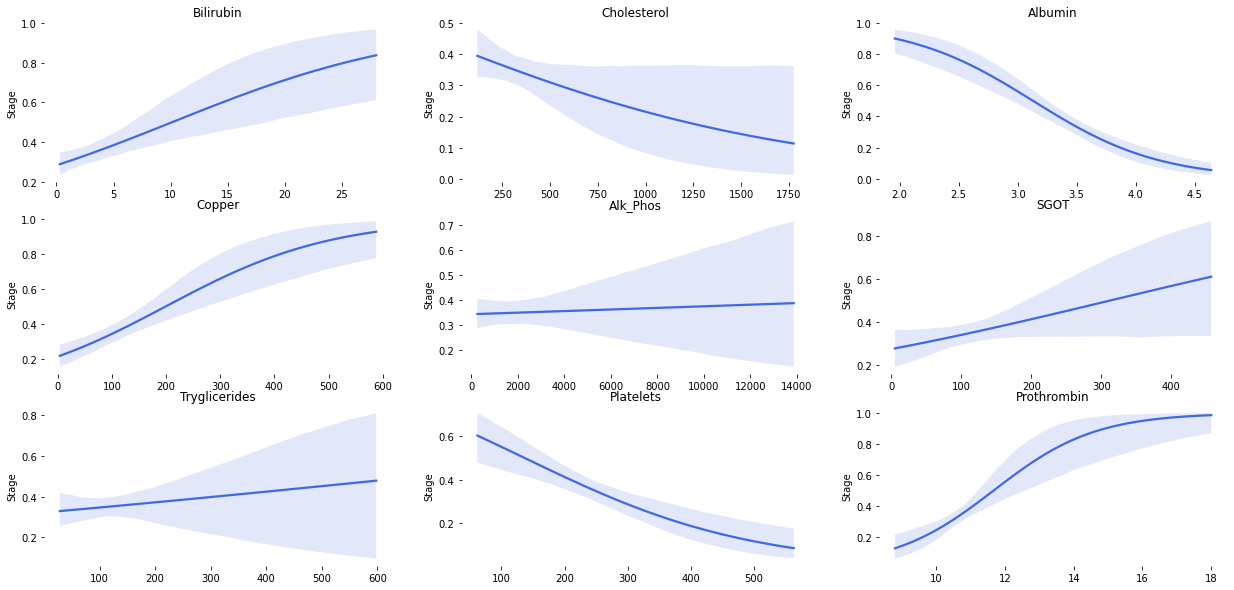

In [ ]:
plt.figure(figsize=(21.2,10))
list_num_toplot = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
plot_reg(list_num_toplot)

### Encoding all categorical feature values

In [ ]:
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
le = preprocessing.LabelEncoder()
for col in categorical_cols:
    after_num_null_correction[col] = le.fit_transform(after_num_null_correction[col])

after_num_null_correction

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,2,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,3,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,4,1925,2,0,54,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,5,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,2,1,67,0,0,0,0,0,1.2,306.4,2.96,136.3,1643.4,108.93,66.3,174.0,10.9,0
408,415,1103,0,0,39,0,0,1,0,0,0.9,176.5,3.83,67.8,1687.7,54.76,131.1,180.0,11.2,1
409,416,1055,0,1,57,0,0,0,0,0,1.6,303.6,3.42,113.1,1273.8,141.91,61.1,143.0,9.9,0
410,417,691,0,1,58,0,0,0,0,0,0.8,262.7,3.75,101.1,1987.5,128.03,101.4,269.0,10.4,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
X = after_num_null_correction.drop(['ID','N_Days','Status','Age','Sex','Stage'],axis = 1)
y = after_num_null_correction.pop('Stage')

# X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8)
# print(X_train.shape, X_val.shape,y_train.shape,y_val.shape)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
log_model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  log_model.fit(X_train, y_train)
  score = log_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


For Fold 1 the accuracy is 0.8333333333333334
For Fold 2 the accuracy is 0.8095238095238095
For Fold 3 the accuracy is 0.8292682926829268
For Fold 4 the accuracy is 0.7560975609756098
For Fold 5 the accuracy is 0.7317073170731707
For Fold 6 the accuracy is 0.7804878048780488
For Fold 7 the accuracy is 0.8292682926829268
For Fold 8 the accuracy is 0.8292682926829268
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.7560975609756098

XGboost model Mean Accuracy =  0.7886759581881533


In [ ]:
from sklearn.metrics import classification_report
XGB_model_predict = log_model.predict(test)
XGB_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], XGB_model_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.67      0.57      0.62        14

    accuracy                           0.76        41
   macro avg       0.73      0.71      0.72        41
weighted avg       0.75      0.76      0.75        41

